In [13]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [38]:
with open('../../output/weights/p_date=2022-10-01-17_21_42/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

22001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [39]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [40]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

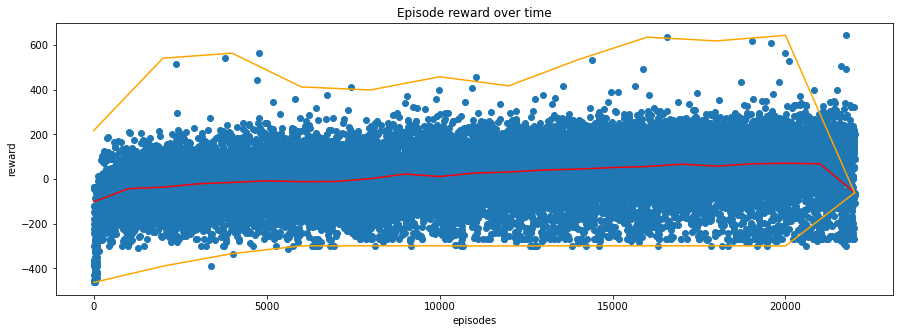

Maximum: 643.6000000000001
Average: 16.812076723785243
Moving Average (simple): {0: -101.8, 1000: -43.0, 2000: -36.4, 3000: -21.4, 4000: -14.9, 5000: -8.2, 6000: -11.5, 7000: -10.8, 8000: 1.8, 9000: 22.6, 10000: 11.4, 11000: 26.8, 12000: 31.5, 13000: 40.5, 14000: 44.7, 15000: 51.5, 16000: 56.2, 17000: 66.7, 18000: 57.9, 19000: 67.9, 20000: 70.9, 21000: 68.2, 22000: -61.4}

Moving Average: ['+1155% (22.6 | -122%)', '-49% (11.4 | -111%)', '+135% (26.8 | -126%)', '+17% (31.5 | -130%)', '+28% (40.5 | -139%)', '+10% (44.7 | -143%)', '+15% (51.5 | -150%)', '+9% (56.2 | -155%)', '+18% (66.7 | -165%)', '-13% (57.9 | -156%)', '+17% (67.9 | -166%)', '+4% (70.9 | -169%)', '-3% (68.2 | -166%)', '-190% (-61.4 | -39%)']
Minimum: -463.0


In [41]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

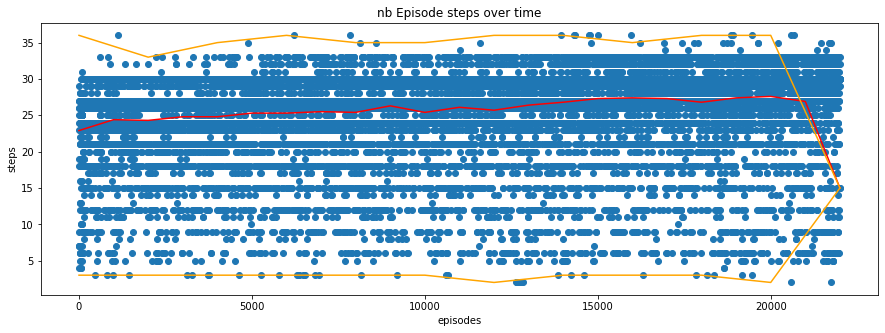

Maximum: 36
Average: 25.926730603154404
Moving Average (simple): {0: 22.9, 1000: 24.4, 2000: 24.3, 3000: 24.8, 4000: 24.8, 5000: 25.3, 6000: 25.3, 7000: 25.5, 8000: 25.4, 9000: 26.3, 10000: 25.4, 11000: 26.1, 12000: 25.7, 13000: 26.4, 14000: 26.8, 15000: 27.3, 16000: 27.4, 17000: 27.3, 18000: 26.8, 19000: 27.4, 20000: 27.6, 21000: 26.9, 22000: 15}

Moving Average: ['+6% (24.4 | 6%)', '0% (24.3 | 6%)', '+2% (24.8 | 8%)', '0% (24.8 | 8%)', '+2% (25.3 | 10%)', '0% (25.3 | 10%)', '+0% (25.5 | 11%)', '0% (25.4 | 10%)', '+3% (26.3 | 14%)', '-3% (25.4 | 10%)', '+2% (26.1 | 13%)', '-1% (25.7 | 12%)', '+2% (26.4 | 15%)', '+1% (26.8 | 17%)', '+1% (27.3 | 19%)', '+0% (27.4 | 19%)', '0% (27.3 | 19%)', '-1% (26.8 | 17%)', '+2% (27.4 | 19%)', '+0% (27.6 | 20%)', '-2% (26.9 | 17%)', '-44% (15.0 | -34%)']
Minimum: 2


In [42]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

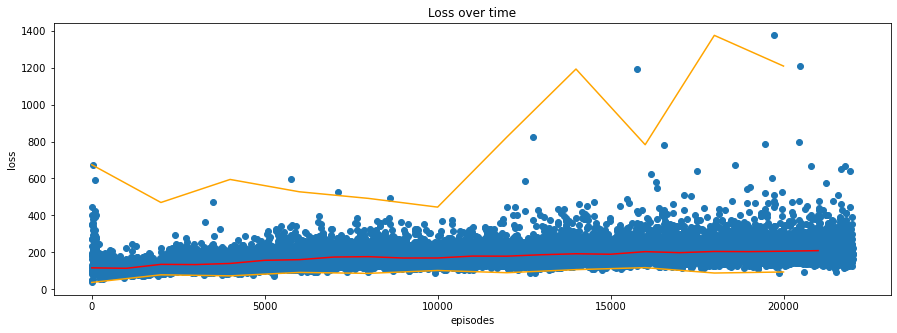

Maximum: 1374.2177734375
Average: 173.2387859992981
Moving Average (simple): {0: 116.6, 1000: 114.2, 2000: 135.4, 3000: 134.3, 4000: 140.4, 5000: 157.4, 6000: 160.9, 7000: 175.1, 8000: 177.1, 9000: 169.8, 10000: 170.0, 11000: 180.2, 12000: 179.8, 13000: 187.5, 14000: 192.8, 15000: 190.3, 16000: 204.3, 17000: 198.8, 18000: 205.3, 19000: 204.4, 20000: 206.6, 21000: 209.7}

Moving Average: ['-2% (114.2 | -2%)', '+18% (135.4 | 16%)', '0% (134.3 | 15%)', '+4% (140.4 | 20%)', '+12% (157.4 | 34%)', '+2% (160.9 | 37%)', '+8% (175.1 | 50%)', '+1% (177.1 | 51%)', '-4% (169.8 | 45%)', '+0% (170.0 | 45%)', '+5% (180.2 | 54%)', '0% (179.8 | 54%)', '+4% (187.5 | 60%)', '+2% (192.8 | 65%)', '-1% (190.3 | 63%)', '+7% (204.3 | 75%)', '-2% (198.8 | 70%)', '+3% (205.3 | 76%)', '0% (204.4 | 75%)', '+1% (206.6 | 77%)', '+1% (209.7 | 79%)']
Minimum: 37.65364456176758


In [43]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")